In [7]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from pylab import mpl
from sklearn.cross_validation import train_test_split
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
figsize=(12,5)
data = pd.read_csv('Titanic_data/train.csv')
import logistic
regex_a = "Survived|Age_*|SibSp|Parch_*|Fare_.*|Cabin_*|Embarked_.*|Sex_.*|Pclass.*|Age_Pclass_scaled|Age_Sex_female_scaled"
df = logistic.get_Feature(data,regex_a)
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.8,random_state=1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe_titanic = Pipeline([
                        ('clf',LogisticRegression(C=10.0,penalty='l2',tol=1e-6))])
pipe_titanic.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('clf', LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False))])

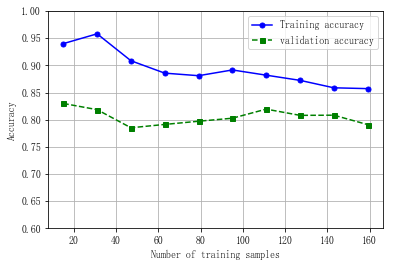

e:\pycharmproject\mltest\venv\lib\site-packages\matplotlib\mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
e:\pycharmproject\mltest\venv\lib\site-packages\matplotlib\mathtext.py:850: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


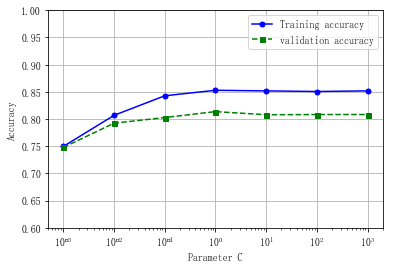

In [8]:
from sklearn.learning_curve import learning_curve
train_size, train_scores, test_scores = learning_curve(estimator=pipe_titanic,
                                                      X=X_train,
                                                      y=y_train,
                                                      train_sizes=np.linspace(0.1,1.0,10),
                                                      cv=10,
                                                      n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(train_size, train_mean,
        color = 'blue', marker='o',
        markersize=5,label = 'Training accuracy')
plt.plot(train_size, test_mean,
        color='green',linestyle='--',
        marker='s',markersize=5,
        label='validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = "upper right")
plt.ylim([0.6,1.0])
plt.show()

from sklearn.learning_curve import validation_curve
param_range = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
train_scores,test_scores=validation_curve(estimator = pipe_titanic,
                                          X = X_train,
                                          y=y_train,
                                          param_name='clf__C',
                                          param_range = param_range,
                                          cv = 6
                    )
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(param_range, train_mean,
        color = 'blue', marker='o',
        markersize=5,label = 'Training accuracy')
plt.plot(param_range, test_mean,
        color='green',linestyle='--',
        marker='s',markersize=5,
        label='validation accuracy')
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc = "upper right")
plt.ylim([0.6,1.0])
plt.show()

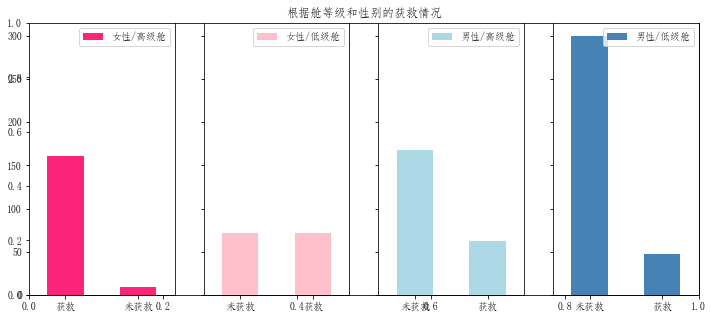

In [9]:
fig = plt.figure(figsize=figsize)
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")
data_train = data

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')



plt.show()

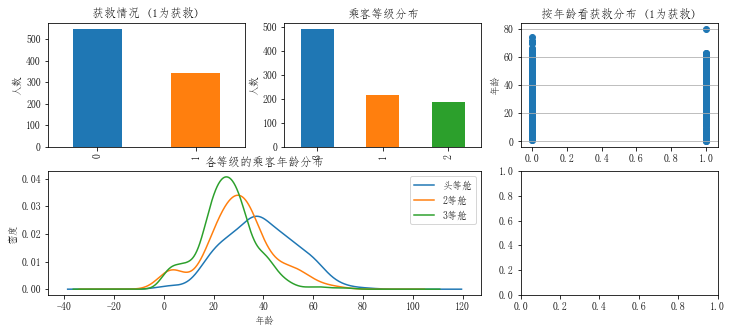

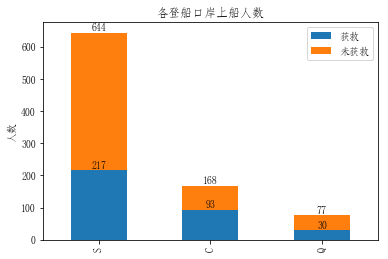

In [10]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
import matplotlib.pyplot as plt
fig = plt.figure(figsize=figsize)
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"获救情况 (1为获救)") # 标题
plt.ylabel(u"人数")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄")                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title(u"按年龄看获救分布 (1为获救)")


plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
x = np.arange(3)
y1 = np.array(list(Survived_1))
y2 = np.array(list(Survived_0+Survived_1))
tdf = pd.DataFrame({u'获救':Survived_1,u'未获救':Survived_0})
tdf.plot(kind='bar',stacked=True)
for a,b in zip(x,y1):
    plt.text(a,b+0.05,'%.f' % b, ha = 'center',va = 'bottom',fontsize=10)
for a,b in zip(x,y2):
    plt.text(a,b+0.05,'%.f' % b, ha = 'center',va = 'bottom',fontsize=10)
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  
plt.show()

<Figure size 432x288 with 0 Axes>

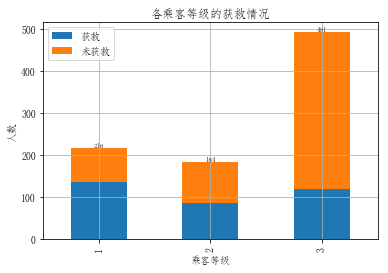

In [11]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
x = np.arange(3)
y = np.array(list(Survived_0+Survived_1))
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)
plt.grid(True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 
plt.show()